You can compare the similarity of two distributions (here two normal distributions, group_blue and group_red) utilizing an adjusted area under the curve (AUC) measure ranging from -0.5 to 0.5, as introduced in [Breimann24c]_. Provide only feature matrix ``X`` and its respective group ``labels`` to the ``comp_auc_adjusted`` function:

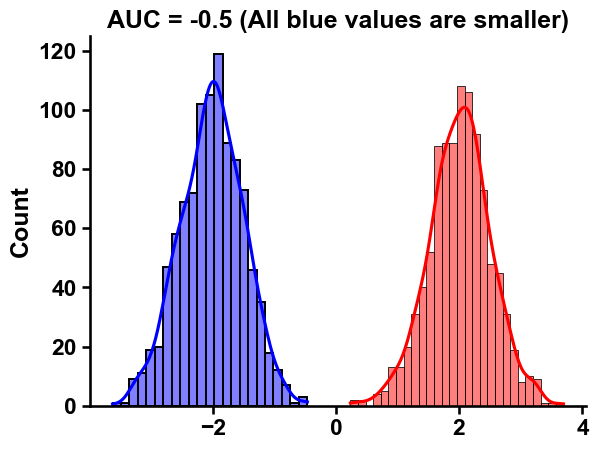

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import aaanalysis as aa
# Generate random data for two groups
group_blue = np.random.normal(-2, 0.5, 1000)  # Mean = -2, Std = 0.5, 1000 samples
group_red = np.random.normal(2, 0.5, 1000)  # Mean = 2, Std = 0.5, 1000 samples

# Combine data into a single dataset and reshape it
X = np.hstack([group_blue, group_red]).reshape(-1, 1)  # Reshape to 2D array
labels = np.array([1]*1000 + [0]*1000)
auc_score = aa.comp_auc_adjusted(X=X, labels=labels)[0]

# Plot
aa.plot_settings()
sns.histplot(group_blue, color="blue", kde=True, label='Group 1', alpha=0.5)
sns.histplot(group_red, color="red", kde=True, label='Group 2', alpha=0.5)
plt.title(f"AUC = {auc_score} (All blue values are smaller)")
sns.despine()
plt.show()

The greater the overlap between both distributions, the closer the ``auc_score`` is to 0:

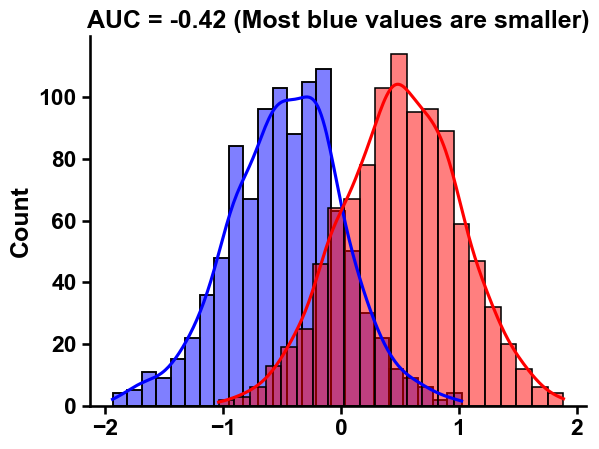

In [21]:
group_blue = np.random.normal(-0.5, 0.5, 1000)
group_red = np.random.normal(0.5, 0.5, 1000)
X = np.hstack([group_blue, group_red]).reshape(-1, 1)  # Reshape to 2D array
labels = np.array([1]*1000 + [0]*1000)
auc_score = aa.comp_auc_adjusted(X, labels)[0]

# Plot
aa.plot_settings()
sns.histplot(group_blue, color="blue", kde=True, label='Group 1', alpha=0.5)
sns.histplot(group_red, color="red", kde=True, label='Group 2', alpha=0.5)
plt.title(f"AUC = {auc_score} (Most blue values are smaller)")
sns.despine()
plt.show()

A ``auc_score`` of 0 indicates a perfect overlap:

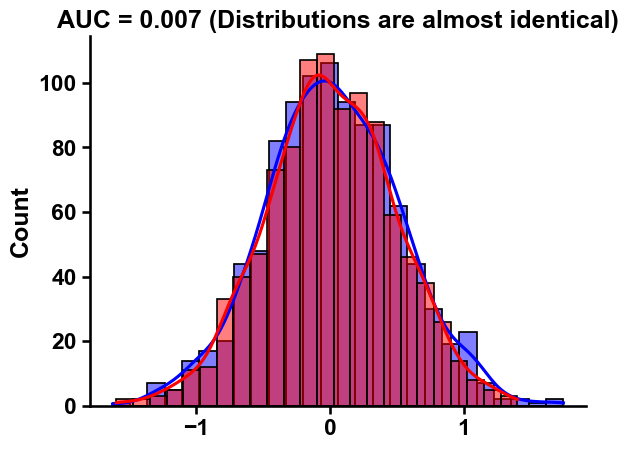

In [22]:
group_blue = np.random.normal(0, 0.5, 1000) 
group_red = np.random.normal(0, 0.5, 1000) 
X = np.hstack([group_blue, group_red]).reshape(-1, 1)  # Reshape to 2D array
labels = np.array([1]*1000 + [0]*1000)
auc_score = aa.comp_auc_adjusted(X, labels)[0]

# Plot
aa.plot_settings()
sns.histplot(group_blue, color="blue", kde=True, label='Group 1', alpha=0.5)
sns.histplot(group_red, color="red", kde=True, label='Group 2', alpha=0.5)
plt.title(f"AUC = {auc_score} (Distributions are almost identical)")
sns.despine()
plt.show()

If all values from the test group (the higher integer value) are greater than the values of the reference group, the ``auc_score`` is 0.5: 

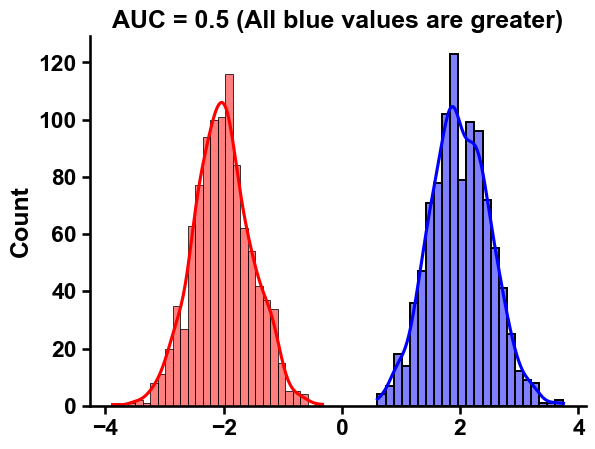

In [23]:
group_blue = np.random.normal(2, 0.5, 1000) 
group_red = np.random.normal(-2, 0.5, 1000) 
X = np.hstack([group_blue, group_red]).reshape(-1, 1)  # Reshape to 2D array
labels = np.array([1]*1000 + [0]*1000)
auc_score = aa.comp_auc_adjusted(X, labels)[0]

# Plot
aa.plot_settings()
sns.histplot(group_blue, color="blue", kde=True, label='Group 1', alpha=0.5)
sns.histplot(group_red, color="red", kde=True, label='Group 2', alpha=0.5)
plt.title(f"AUC = {auc_score} (All blue values are greater)")
sns.despine()
plt.show()